## Student Information

Please enter the names and IDs of the two students below:

1. **Name**: Youssef mohamed abdelkareem hagag  
   **ID**: `9211436`

2. **Name**: kareem samy fawzy elsayed   
   **ID**: `9210838`


## Students Instructions

Welcome to this learning module! As you embark on this journey, please keep the following in mind:

- Clearly state your personal information where indicated.
- Read the requirment carefully and refer to your lecture to understand any unclear concepts.
- Hints are provided to guide you in one of the right direction but all ways lead to Rome.
- **Keep the answers of the Essay questions in code cells for more clarity.**

Remember, adhering to these guidelines is crucial for your success and will help you maximize your learning experience.


## Classifiers Boosting Algorithms

In this lab, we will implement the AdaBoost algorithm as an ensemble learning technique which
aims to combine a number of weak classifiers to yield a strong classifier at the end.
The idea of this lab is to identify whether a tumor with given characteristics is malignant or
benign. This is a two-class classification problem.

**HINT**: There are other boosting algorithms worth exploring like the xgboost.

## Dataset and Features

You will be working on the dataset from *Hastie et al,* for breast tumor classification with 10 features representing the tumor's:

                              1. Area            6. Texture
                              2. Perimeter       7. Symmetry
                              3. Radius          8. Greyscale Level
                              4. Compactness     9. Fractal Dimension
                              5. Concavity      10. Coastline Approximation.
There is one output variable which is diagnosis. It takes one of two values `+1` for malignant and `-1` for benign.

### Question 1:
Why it is sometimes better to have the two class values `+1` and `-1` instead of `+1`
and `0`?\
**HINT :** Think about the voting scheme at the end of the boosting algorithm. How can the class values
affect this scheme?

In [62]:
'''
    Your answer: 
    AdaBoost combines multiple weak classifiers by assigning weights to each classifier based on its performance. 
    During classification, the final prediction is made by summing the weighted predictions of all weak classifiers.
     
    When using class values of +1 and -1, the summing process is straightforward, as the predictions from weak 
    classifiers can directly contribute to the final decision through addition. 
    
    On the other hand, if the class values were +1 and 0, the classifiers' predictions would need additional 
    processing to determine the final decision, complicating the voting scheme for no reason.
'''

"\n    Your answer: \n    AdaBoost combines multiple weak classifiers by assigning weights to each classifier based on its performance. \n    During classification, the final prediction is made by summing the weighted predictions of all weak classifiers.\n     \n    When using class values of +1 and -1, the summing process is straightforward, as the predictions from weak \n    classifiers can directly contribute to the final decision through addition. \n    \n    On the other hand, if the class values were +1 and 0, the classifiers' predictions would need additional \n    processing to determine the final decision, complicating the voting scheme for no reason.\n"

## Requirement
You are required to fill the function `adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf).`\
This function takes as parameters:

| | |
|:---|:-|
| **Y_train**| The target values for the training set |
| **X_train**| The input features for the training set.|
| **Y_test**| The target values for the test set.|
| **Y_train**| The input features for the training set.|
| **T**| The number of iterations of the AdaBoost Algorithm.|
| **clf**| The classifier to be used. (In our case, we are using a decision tree stump as a base classifier). You can use any other classifier.|

This function should return two values:
- The accuracy of the model on the training set.
- The accuracy of the model on the test set.


#### Fair Note:
In the explanation video, we assumed that (T) is the number of models you want to fit. However, this is not always the case. You may have a model base (like here we have decision trees) and you are allowed to use as many of it as you can. So (T) here becomes the number of iterations where your goal is to enhance the performance with as few iterations as possible. 

Do not get confused:
- If your case is you have T models only, we set T = number of models to fit.
- If you are allowed to use as many models as you can (as many decision trees as you need), then T is the number of iterations to choose. In such case, T becomes a parameter controlled by the programmer.

In [52]:
## imports ##
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2

import utils

**NOTE** we prepared some utility functions to help you throughout the lab. please go and check the file *utils.py* and make sure you understand each function and know how to use it.

### AdaBoost Implementation

AdaBoost is an iterative algorithm that gives weights for the best classifier every iteration, updates weights of the data points, then repeats until convergence.

The steps of the algorithm are:

1. Initialize weights of the training examples:

$$w_{m} = \frac {1}{M}, m = 1,2,...M$$

                                        M: number of training examples. 

2. For t=1 to $T$:

    a) Select a classifier $h_{t}$ that best fits to the training data using weights $w_{m}$ of the training examples.

    b) Compute error of $h_{t}$ as:
$$err_{t} = \frac {\Sigma_{m=1}^{M} w_{m} \phi (c_{m} \neq h_{t}(x_{m}))}{\Sigma_{m=1}^{M} w_{m}}$$

    c) Compute weight of classifier:
$$\alpha_{t} = \log (\frac {1-err_{t}}{err_{t}} )$$

    d) Update weights of wrongly classified examples:
$$w_{m} = w_{m} * \exp^{\alpha_{t} \phi (c_{m} \neq h_{t}(x_{m}))}, \space m = 1 ... M$$

    e) Renormalize weights $w_{m}$


\
3. Output: $C(x)= argmax_{k}\space (\space \Sigma_{t=1}^{T} \alpha_{t} * \phi (h_{t}(x) = k)) \space)$

**Where** in step 2.B and 2.D, the $\phi (y)$ function is called the *miss indicator* function that gives values:

                                     1: if y is True
                                     0: if y is False

In [53]:
def adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf):
    
    #TODO: FILL THE FUNCTION with the implementation as the steps above
    train_length = len(X_train)
    test_length = len(X_test)

    # TODO [1]: Initialize weights
    w = np.ones(train_length)/train_length


    ## TODO [2]:  Initialize the training and test data with empty array placeholders
    #### Hint: what should be their shape?
    pred_train = np.zeros(train_length) ## predicted classes of the training examples
    pred_test = np.zeros(test_length)  ## predicted classes of the test examples

    ## TODO [3]: loop over the boosting iterations 
    for i in range(T): 

        # TODO [4]: Fit a classifier with the specific weights 
        ## TODO [4.A]: fit the classifier on the training data
        #### Hint: search how sklearn.tree.DecisionTreeClassifier fits classifier on data
        ### Hint: search for parameter weights in the fit matrix
        clf.fit(X_train, Y_train, sample_weight=w)
        
        # TODO [4.B]: predict classes for the training data and test data
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        
        # TODO [5]: calculate the miss Indicator function
        miss = pred_train_i != Y_train
        
        # TODO [6]: calculate the error for the current classifier (err_t)
        err_t = np.sum(w * miss)/np.sum(w)
        
        # TODO [7]: calculate current classifier weight (Alpha_t)
        alpha_t = np.log((1-err_t)/err_t)
        
        # TODO [8]: update the weights 
        w *= np.exp(alpha_t * miss)
        # renormalize the weights
        w /= np.sum(w)  

        # TODO [9] Add to the overall predictions
        pred_train += alpha_t * pred_train_i
        pred_test += alpha_t * pred_test_i

    # Apply sign function to get the final predictions
    pred_train = np.sign(pred_train)
    pred_test = np.sign(pred_test)

    # TODO [10]: Return error rate in train and test set
    #### Hint: use function get_accuracy from utils.py
    train_error = 1 - utils.get_accuracy(pred_train, Y_train)
    test_error = 1 - utils.get_accuracy(pred_test, Y_test)
    return train_error, test_error

### Testing the Boosted Classifier

Now we will use the function you implemented to build a classifer.\
You will not change code here, only read the code below and run it to see how **AdaBoost** enhanced the performance.

Reading Data ...
Number of Iterations :  10
Number of Iterations :  60
Number of Iterations :  110
Number of Iterations :  160
Number of Iterations :  210
Number of Iterations :  260
Number of Iterations :  310
Number of Iterations :  360


c:\Users\yousi\Desktop\college stuff\NN\Lab 5 - AdaBoost Classifier\utils.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(range(0, 450, 50))


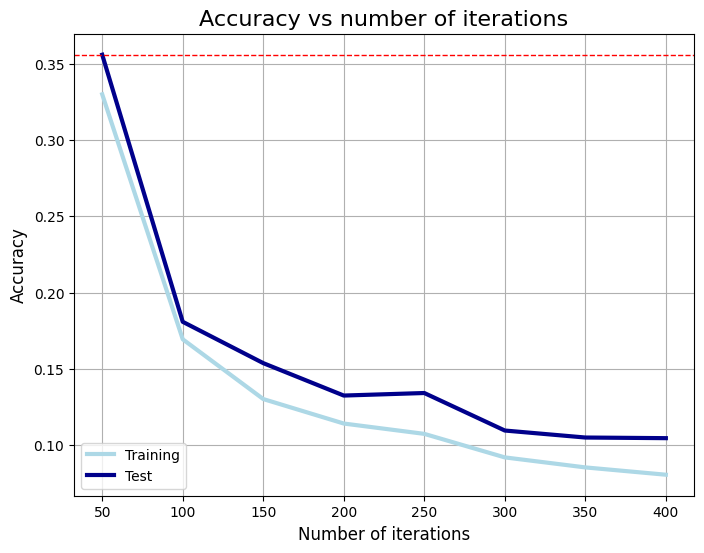

In [54]:
#### DO NOT CHANGE CODE ####

## First, read the dataset
x,y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y
print('Reading Data ...')

# Split into training and test set
train, test = train_test_split(df, test_size=0.2) # this function shuffles the data points, and splits the data into
                                                  # 80% training set and 20% test set (indicated by test_size=0.2)


X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]
# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)

# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
acc_train, acc_test = [],[]
x_range = range(10, 410, 50)
for i in x_range:
    print('Number of Iterations : ' , i)
    acc_i = adaboost_classifier(Y_train, X_train, Y_test, X_test, i, clf_tree)
    acc_train.append(acc_i[0])
    acc_test.append(acc_i[1])

# Compare error rate vs number of iterations
utils.plot_accuracy(acc_train, acc_test)

### Question 2:
Justify why the plot is the way it is (is it increasing or decreasing? why? when does it flattens out?)

In [61]:
'''
    Your answer:
    The error plot decreases the higher the iterations T get, which is to be expected as the accuracy of the
    Adaboost classifier gets better with more iterations.

    The plot flattens out at about 300 iterations (the exact value is somewhat rendom due to the use of
    feuture permutaions in the Decision Tree Classifier), this is what we call the elbow of the graph
    and it is a good indicator that using more iterations T may be of waste since increasing them is
    becoming less valuable.
'''

'\n    Your answer:\n    The error plot decreases the higher the iterations T get, which is to be expected as the accuracy of the\n    Adaboost classifier gets better with more iterations.\n\n    The plot flattens out at about 300 iterations (the exact value is somewhat rendom due to the use of\n    feuture permutaions in the Decision Tree Classifier), this is what we call the elbow of the graph\n    and it is a good indicator that using more iterations T may be of waste since increasing them is\n    becoming less valuable.\n'

### Question 3

The number of iterations (T) is what we call a hyper parameter:
   - Its value differs from model to model and from problem to problem.
   - Its value is not learnt by time, it is set by the programmer.
   
Suggest ways to select the optimal T keeping in mind that:
   - If T is too big, the training time is large (you loop for T times, each time takes a model to fit and this model might take hours to fit)
   - If T is too small, the boosting might not reach the best values it can get.
   
   

**HINT**: Look at the graph of number of iterations vs performance and search for elbow method. Try to understand it and explain what it does.\
**HINT**: There are other hyper-parameter selection techniques, search for them as well.

In [2]:
'''
    Your answer:
    To select the optimal number of iterations T for the AdaBoost algorithm, we can consider the following approaches:

    Elbow Method:
    The elbow method involves plotting the performance metric (e.g., error rate or accuracy) against T 
    and identifying the point where the performance starts to flatten out. This point indicates diminishing returns 
    in performance improvement with increasing T, suggesting an optimal value. The elbow method helps to balance 
    between model complexity and performance improvement.
    
    Cross-Validation: 
    Split data into training and validation sets. Train the AdaBoost model with different values of T 
    on the training set and evaluate its performance on the validation set. Choose the value of T that 
    gives the best performance on the validation set. This method provides a direct assessment of the model's 
    performance with different values of T.

    Grid Search: 
    Perform a grid search over a predefined range of values for T. Train and evaluate the AdaBoost model 
    with each value of T using cross-validation. Select the value of T that yields the best average performance 
    across the cross-validation folds.
    
    Early Stopping: 
    Monitor the performance of the AdaBoost model on a separate validation set during training. 
    Stop the training process when the performance on the validation set stops improving or starts to degrade. 
    This approach helps to prevent overfitting and avoids training the model for too many iterations unnecessarily.

    Model-based Selection: 
    Some methods involve estimating the complexity of the model and selecting the value of T based on this 
    complexity measure. For example, we could use metrics like AIC (Akaike Information Criterion) or BIC 
    (Bayesian Information Criterion) to select the optimal value of T based on the trade-off between model 
    complexity and goodness of fit.

    Each of these approaches has its advantages and drawbacks, so it's essential to consider the specific 
    characteristics of our data and the computational resources available when selecting the optimal value of T. 
'''

"\n    Your answer:\n    To select the optimal number of iterations T for the AdaBoost algorithm, we can consider the following approaches:\n\n    Elbow Method:\n    The elbow method involves plotting the performance metric (e.g., error rate or accuracy) against T \n    and identifying the point where the performance starts to flatten out. This point indicates diminishing returns \n    in performance improvement with increasing T, suggesting an optimal value. The elbow method helps to balance \n    between model complexity and performance improvement.\n    \n    Cross-Validation: \n    Split data into training and validation sets. Train the AdaBoost model with different values of T \n    on the training set and evaluate its performance on the validation set. Choose the value of T that \n    gives the best performance on the validation set. This method provides a direct assessment of the model's \n    performance with different values of T.\n\n    Grid Search: \n    Perform a grid searc

## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom. Make sure you meet the submission deadline to avoid any late penalties.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!
